# Definitions


---


Scenario - Predicting if a user will purchase a product.

True Positive:
*  Model predicts user will purchase product
* User purchases product

False Positive:
* Model predicts user will purchase product
* User does not purchase product

False Negative:
* Model predicts useer will not purchase product
* user does purchase product

True Negative:
* Model preducts user will not purchase product
* User does not purchase product

# Accuracy

---

Accuracy is the ratio of correct predictions to total predictions

\begin{align}
        Accuracy = \frac{TP + TN}{TP+TN+FP+FN}
    \end{align}

It is not useful for quantifying the performance of imbalanced data.

# Precision


---

Precision attempts to answer the following question:

What proportion of positive identifications was actually correct?

\begin{align}
Precision = \frac{TP}{TP+FP}
\end{align}



In [1]:
# Assume we have a model that predicts whether or not a tumour is malignant, the following results are found:

TP = 1
FP = 1
FN = 8
TN = 90


In [2]:
precision = TP/(TP+FP)
precision

0.5

In other words, when a tumour is malignant it is correct 50% of the time.
# Recall


---

Recall attempts to answer the following question:

What proportion of actual positives was identified correctly?

\begin{align}
Recall = \frac{TP}{TP+FN}
\end{align}

In [3]:
recall = TP/(TP+FN)
recall

0.1111111111111111

In other words, our model correctly identifies 11% of malignant tumours

# F1 Score

The F1 Score attempts to create a single value out of the harmonic mean of precision and recall

\begin{align}
F1 Score = 2\frac{precision*recall}{precision+recall} = \frac{2TP}{2TP+FP+FN}
\end{align}

In [4]:
F1 = (2*TP)/((2*TP)+FP+FN)
F1

0.18181818181818182

Let's see how adjusting the threshold for predicions affects precision and recall

In [5]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [201]:
X,y = make_classification(n_samples=1000, n_informative=2, flip_y=0.25, random_state=42)

In [202]:
X.shape, y.shape

((1000, 20), (1000,))

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [204]:
clf = GaussianNB().fit(X_train, y_train)

In [205]:
threshold = 0.5

In [206]:
def get_prediction(proba_arr:np.array) -> int:
  if proba_arr[0] == 0:
    return 1
  return 0

def get_predictions_for_threshold(X_train:np.array, threshold:int) -> np.array:
  """
  returns predictions for a given threshold value (0 - 1)
  """
  decisions = (clf.predict_proba(X_train) >= threshold).astype(int)
  predictions = np.array([get_prediction(x) for x in decisions])
  return predictions

In [207]:
def true_positive(preds:np.array, y_train:np.array):
  return ((y_train==1) &(preds==1)).sum()
def false_positive(preds:np.array, y_train:np.array):
  return ((y_train == 0) & (preds == 1)).sum()
def true_negative(preds:np.array, y_train:np.array):
  return ((y_train == 0) & (preds == 0)).sum()
def false_negative(preds:np.array, y_train:np.array):
  return ((y_train == 1) & (preds == 0)).sum()
def precision(true_positive:int, false_positive:int) -> float:
  return true_positive/(true_positive+false_positive)
def recall(true_positive:int, false_negative) -> float:
  return true_positive/(true_positive+false_negative)

def f1(precision:float, recall:float) -> float:
  return 2*((precision*recall)/ (precision+recall))

# Testing with 0.5 Threshold

In [208]:
predictions_05 = get_predictions_for_threshold(X_train, 0.5)
tp_05 = true_positive(predictions_05, y_train)
tn_05 = true_negative(predictions_05, y_train)
fp_05 = false_positive(predictions_05, y_train)
fn_05 = false_negative(predictions_05, y_train)
precision_05 = precision(tp_05,fp_05 )
recall_05 = recall(tp_05, fn_05)
f1_05 = f1(precision_05, recall_05)

In [209]:
precision_05, recall_05

(0.8080495356037152, 0.729050279329609)

## Compare with sklearn metrics

In [210]:
preds = clf.predict(X_train)
from sklearn.metrics import precision_score, recall_score, f1_score

In [211]:
assert np.isclose(precision_05, precision_score(y_train, preds))
assert np.isclose(recall_05, recall_score(y_train, preds))
assert np.isclose(f1_05, f1_score(y_train, preds))

# generate plot

In [228]:
thresholds = np.arange(1e-3,1.01,1e-3)

In [230]:
preds_dict = {}
for i in thresholds:
  preds_dict[i] = get_predictions_for_threshold(X_train, i)
precision_dict = {}
recall_dict = {}
f1_dict = {}
for k,v in preds_dict.items():
  tp = true_positive(v, y_train)
  tn = true_negative(v, y_train)
  fp = false_positive(v, y_train)
  fn = false_negative(v, y_train)
  precision_dict[k] = precision(tp,fp )
  recall_dict[k] = recall(tp, fn)
  f1_dict[k]= f1(precision_dict[k], recall_dict[k])


Text(0.5, 1.0, 'PRecision - Recall Curve')

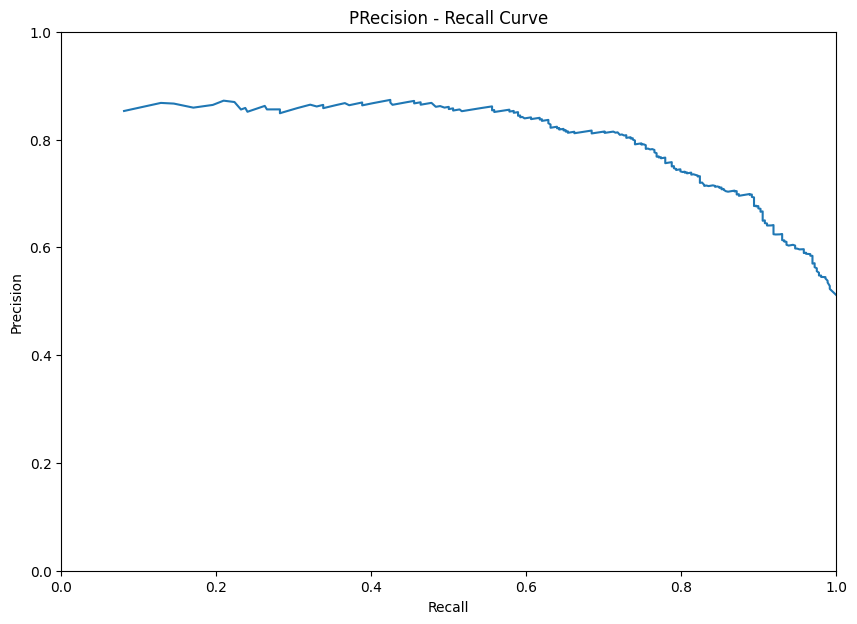

In [234]:

fig, ax = plt.subplots(figsize = (10,7))
ax.plot(recall_dict.values(), precision_dict.values() )
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.set_ylim((0,1))
ax.set_xlim((0,1))
ax.set_title('Precision - Recall Curve')

Text(0.5, 1.0, 'Threshold - F1 Score Curve')

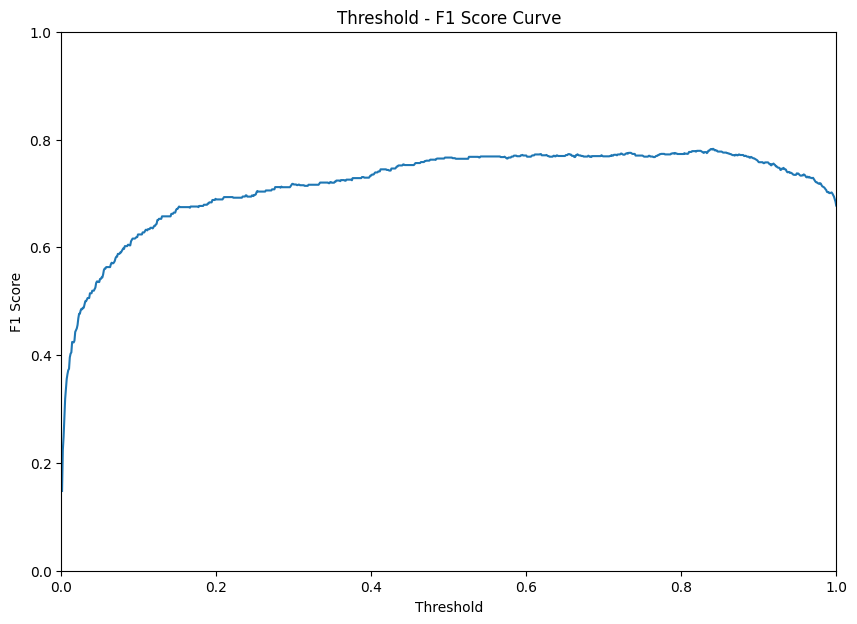

In [235]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(thresholds, f1_dict.values() )
ax.set_ylabel('F1 Score')
ax.set_xlabel('Threshold')
ax.set_ylim((0,1))
ax.set_xlim((0,1))
ax.set_title('Threshold - F1 Score Curve')